<a href="https://colab.research.google.com/github/Thipwadee/Project2/blob/main/Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from pandas.api.types import  CategoricalDtype

# machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression


In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/My Drive/Paper/Data-Survey-13-7-2023.xlsx', skiprows = 1)
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Temp,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
0,1,2022-12-28 00:00:00,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,2,3,2,0,-1,0,-1,0
1,2,2022-12-28 00:00:00,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,0,5,3,1,0,0,1,-1,0
2,3,2022-12-28 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,0,4,1,1,0,0,0,0,0
3,4,2022-12-28 00:00:00,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,3,4,4,2,-1,0,0,-1,1
4,5,2022-12-28 00:00:00,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,4,3,0,-1,-1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,13/05/2023,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,3,2,4,3,2,-1,1,0,-1,-1
189,190,13/05/2023,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,3,1,4,3,4,-1,1,1,-1,-1
190,191,13/05/2023,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,4,4,4,5,3,-1,-1,1,-1,-1
191,192,13/05/2023,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,3,1,5,0,3,-1,1,1,-1,-1


In [ ]:
data = pd.read_excel('/content/Data-Survey-13-7-2023_1.xlsx', skiprows = 1)
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Temp,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
0,1,2022-12-28 00:00:00,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,2,3,2,0,-1,0,-1,0
1,2,2022-12-28 00:00:00,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,0,5,3,1,0,0,1,-1,0
2,3,2022-12-28 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,0,4,1,1,0,0,0,0,0
3,4,2022-12-28 00:00:00,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,3,4,4,2,-1,0,0,-1,1
4,5,2022-12-28 00:00:00,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,4,3,0,-1,-1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,13/05/2023,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,3,2,4,3,2,-1,1,0,-1,-1
189,190,13/05/2023,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,3,1,4,3,4,-1,1,1,-1,-1
190,191,13/05/2023,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,4,4,4,5,3,-1,-1,1,-1,-1
191,192,13/05/2023,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,3,1,5,0,3,-1,1,1,-1,-1


In [ ]:
data.rename(columns = {'Unnamed: 0' : 'No', 'Unnamed: 1' : 'Date', 'Unnamed: 2' : 'เพศ', 'Unnamed: 3' : 'Age', 'Unnamed: 4' : 'Weight',
                       'Unnamed: 5' : 'Height', 'Unnamed: 6' : 'BMI', 'Unnamed: 7' : 'พื้นที่ทำแบบสอบถาม', 'Unnamed: 8' : 'เวลา',
                       '%RH' : 'RH','V (m/s)' : 'V','Unnamed: 18' : 'Thermal_acceptance', 'Unnamed: 26' : 'Thermal_sensation_Vote'
                       }, inplace = True)
data

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
0,1,2022-12-28 00:00:00,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,2,3,2,0,-1,0,-1,0
1,2,2022-12-28 00:00:00,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,0,5,3,1,0,0,1,-1,0
2,3,2022-12-28 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,0,4,1,1,0,0,0,0,0
3,4,2022-12-28 00:00:00,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,3,4,4,2,-1,0,0,-1,1
4,5,2022-12-28 00:00:00,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,4,3,0,-1,-1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,13/05/2023,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,3,2,4,3,2,-1,1,0,-1,-1
189,190,13/05/2023,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,3,1,4,3,4,-1,1,1,-1,-1
190,191,13/05/2023,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,4,4,4,5,3,-1,-1,1,-1,-1
191,192,13/05/2023,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,3,1,5,0,3,-1,1,1,-1,-1


In [ ]:
data.shape

(193, 37)

In [ ]:
data.columns

Index([                    'No',                   'Date',
                          'เพศ',                    'Age',
                       'Weight',                 'Height',
                          'BMI',     'พื้นที่ทำแบบสอบถาม',
                         'เวลา',                   'Temp',
                   'Globe temp',                     'RH',
                            'V',               'วงเล็บ 1',
                'สมการหลัง บวก',               'วงเล็บ 2',
       'ยกกำลัง 1 ส่วน 4/ 0.25',              'ลบ 273.15',
           'Thermal_acceptance',                       -3,
                             -2,                       -1,
                              0,                     '+1',
                           '+2',                     '+3',
       'Thermal_sensation_Vote',               'อุณหภูมิ',
                     'ความชื้น',                'กระแสลม',
             'ความแรงของแสงแดด',    'เหงื่อบริเวณผิวหนัง',
                     'ความร้อน',             'ความชื้น.1

In [ ]:
data.describe()

,No,Age,Weight,Height,BMI,Temp,Globe temp,RH,V,วงเล็บ 1,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
count,193.000000,193.000000,191.000000,191.000000,191.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,97.000000,30.720207,68.544503,167.335079,24.364324,30.895337,31.533161,48.780829,0.265311,8.621030e+09,...,2.559585,1.989637,2.414508,2.207254,2.129534,-0.647668,-0.103627,0.637306,-0.419689,-0.450777
std,55.858452,11.950177,22.407397,9.767442,7.126414,2.310264,2.432899,7.491418,0.285395,2.756796e+08,...,1.667028,1.454124,1.404679,2.010014,1.941544,0.510522,0.558679,0.543002,0.554363,0.558002
min,1.000000,20.000000,41.000000,144.000000,16.015625,27.200000,27.600000,38.100000,0.045000,8.181304e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,49.000000,25.000000,49.000000,158.500000,19.146722,29.100000,29.800000,42.500000,0.120000,8.423330e+09,...,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000
50%,97.000000,27.000000,63.000000,169.000000,22.230987,30.800000,31.800000,46.600000,0.185000,8.647977e+09,...,2.000000,2.000000,2.000000,2.000000,2.000000,-1.000000,0.000000,1.000000,0.000000,0.000000
75%,145.000000,36.000000,76.500000,173.500000,27.548209,32.700000,33.100000,56.100000,0.330000,8.796388e+09,...,4.000000,3.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,193.000000,70.000000,147.000000,187.000000,48.553310,35.600000,36.200000,64.200000,1.765000,9.157997e+09,...,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##ดูค่าว่าง

In [ ]:
data.isnull().sum()

No                          0
Date                        0
เพศ                         0
Age                         0
Weight                      2
Height                      2
BMI                         2
พื้นที่ทำแบบสอบถาม          0
เวลา                        0
Temp                        0
Globe temp                  0
RH                          0
V                           0
วงเล็บ 1                    0
สมการหลัง บวก               0
วงเล็บ 2                    0
ยกกำลัง 1 ส่วน 4/ 0.25      0
ลบ 273.15                   0
Thermal_acceptance          0
-3                        193
-2                        189
-1                        154
0                         134
+1                        140
+2                        171
+3                        177
Thermal_sensation_Vote      0
อุณหภูมิ                    0
ความชื้น                    0
กระแสลม                     0
ความแรงของแสงแดด            0
เหงื่อบริเวณผิวหนัง         0
ความร้อน                    0
ความชื้น.1

#Data Cleaning

จัดการกับค่าว่างด้วย KNN

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(data[['Weight', 'Height']])
imputed[163:168]


array([[ 78.        , 185.        ],
       [ 65.        , 169.        ],
       [ 68.54450262, 167.33507853],
       [ 64.        , 154.        ],
       [ 65.        , 150.        ]])

In [ ]:
imputed[123:130]

array([[ 49.        , 169.        ],
       [ 46.        , 155.        ],
       [ 63.        , 173.        ],
       [ 89.        , 153.        ],
       [ 68.54450262, 167.33507853],
       [ 62.        , 163.        ],
       [ 60.        , 155.        ]])

In [ ]:
data.Weight.fillna(68, inplace=True)
data.Height.fillna(167, inplace=True)

In [ ]:
BMI1 = 68/(1.67**2)
BMI1

24.38237297859371

In [ ]:
data.BMI.fillna(BMI1, inplace=True)

In [ ]:

data[125:130]

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
125,126,2023-01-06 00:00:00,ชาย,20,63.0,173.0,21.049818,ภายนอก / ใต้ร่มไม้,15:44 PM,30.2,...,2,4,0,0,4,-1,-1,1,0,0
126,127,2023-01-06 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก / ใต้ร่มไม้,15:44 PM,30.2,...,1,0,1,1,2,0,0,1,0,-1
127,128,13/05/2023,ชาย,57,68.0,167.0,24.382373,ภายใต้อาคาร,11.50 AM,32.7,...,3,4,2,3,3,-1,0,1,0,-1
128,129,13/05/2023,ชาย,56,62.0,163.0,23.335466,ภายใต้อาคาร,11.50 AM,32.7,...,2,3,2,2,0,-1,0,1,-1,0
129,130,13/05/2023,หญิง,60,60.0,155.0,24.973985,ภายใต้อาคาร,11.58 AM,32.2,...,6,3,1,6,5,-1,-1,1,-1,-1


In [ ]:
data.isnull().sum()

No                          0
Date                        0
เพศ                         0
Age                         0
Weight                      0
Height                      0
BMI                         0
พื้นที่ทำแบบสอบถาม          0
เวลา                        0
Temp                        0
Globe temp                  0
RH                          0
V                           0
วงเล็บ 1                    0
สมการหลัง บวก               0
วงเล็บ 2                    0
ยกกำลัง 1 ส่วน 4/ 0.25      0
ลบ 273.15                   0
Thermal_acceptance          0
-3                        193
-2                        189
-1                        154
0                         134
+1                        140
+2                        171
+3                        177
Thermal_sensation_Vote      0
อุณหภูมิ                    0
ความชื้น                    0
กระแสลม                     0
ความแรงของแสงแดด            0
เหงื่อบริเวณผิวหนัง         0
ความร้อน                    0
ความชื้น.1

In [ ]:
data.describe()

,No,Age,Weight,Height,BMI,Temp,Globe temp,RH,V,วงเล็บ 1,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,97.000000,30.720207,68.538860,167.331606,24.364511,30.895337,31.533161,48.780829,0.265311,8.621030e+09,...,2.559585,1.989637,2.414508,2.207254,2.129534,-0.647668,-0.103627,0.637306,-0.419689,-0.450777
std,55.858452,11.950177,22.290455,9.716496,7.089200,2.310264,2.432899,7.491418,0.285395,2.756796e+08,...,1.667028,1.454124,1.404679,2.010014,1.941544,0.510522,0.558679,0.543002,0.554363,0.558002
min,1.000000,20.000000,41.000000,144.000000,16.015625,27.200000,27.600000,38.100000,0.045000,8.181304e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,49.000000,25.000000,49.000000,159.000000,19.146722,29.100000,29.800000,42.500000,0.120000,8.423330e+09,...,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000
50%,97.000000,27.000000,63.000000,169.000000,22.343516,30.800000,31.800000,46.600000,0.185000,8.647977e+09,...,2.000000,2.000000,2.000000,2.000000,2.000000,-1.000000,0.000000,1.000000,0.000000,0.000000
75%,145.000000,36.000000,75.000000,173.000000,27.548209,32.700000,33.100000,56.100000,0.330000,8.796388e+09,...,4.000000,3.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,193.000000,70.000000,147.000000,187.000000,48.553310,35.600000,36.200000,64.200000,1.765000,9.157997e+09,...,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##ดูค่า Outlier

In [ ]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7e3df72c11b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e3df72c17b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e3df72c0eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e3df72c1db0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e3df72c28f0>],
 'means': []}

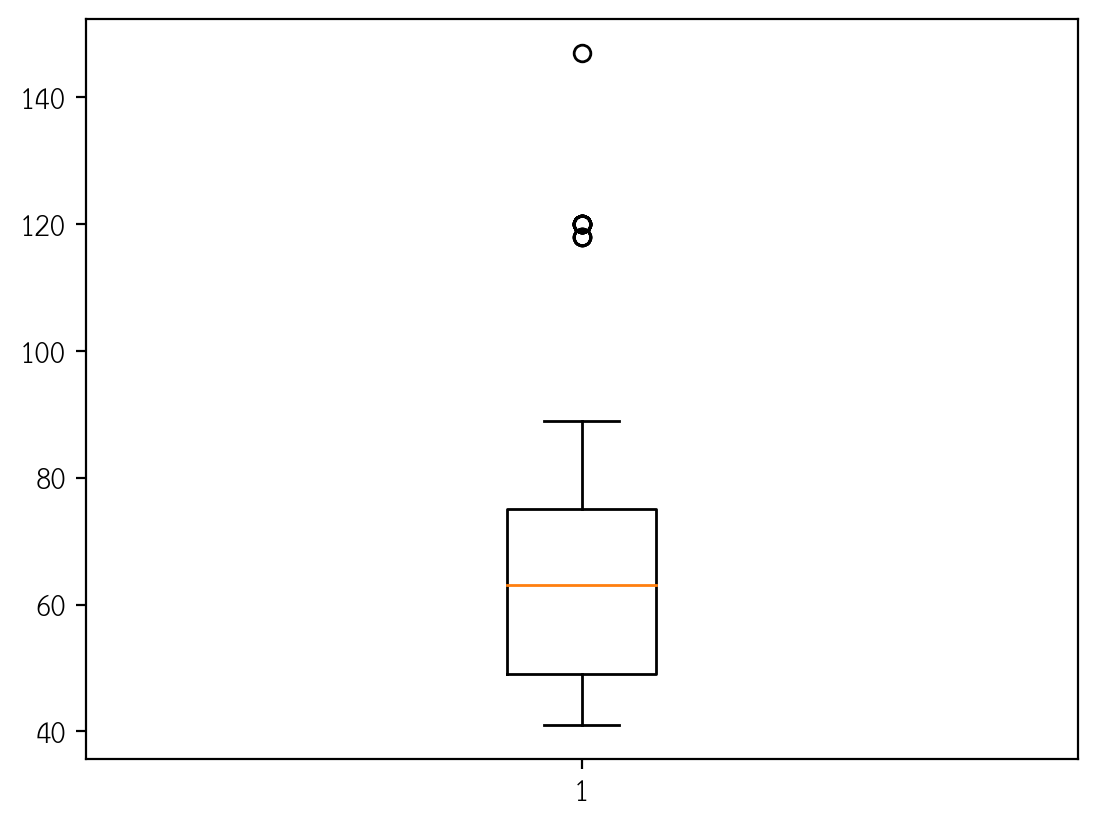

In [ ]:

plt.boxplot(data['Weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e3df521cd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7e3df521d2d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e3df521caf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e3df521d810>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e3df521dab0>],
 'means': []}

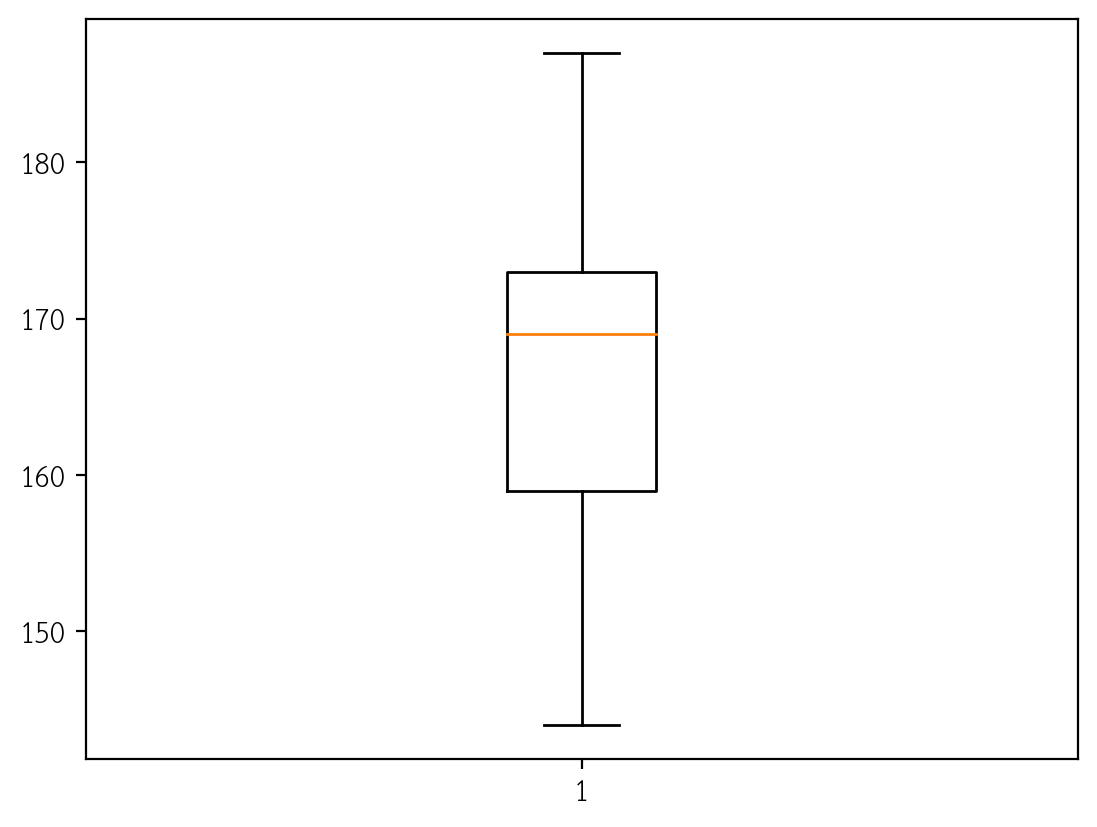

In [ ]:
plt.boxplot(data['Height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e3df526e800>,
 'caps': [<matplotlib.lines.Line2D at 0x7e3df526ed40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e3df526e560>],
 'medians': [<matplotlib.lines.Line2D at 0x7e3df526f280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e3df526f520>],
 'means': []}

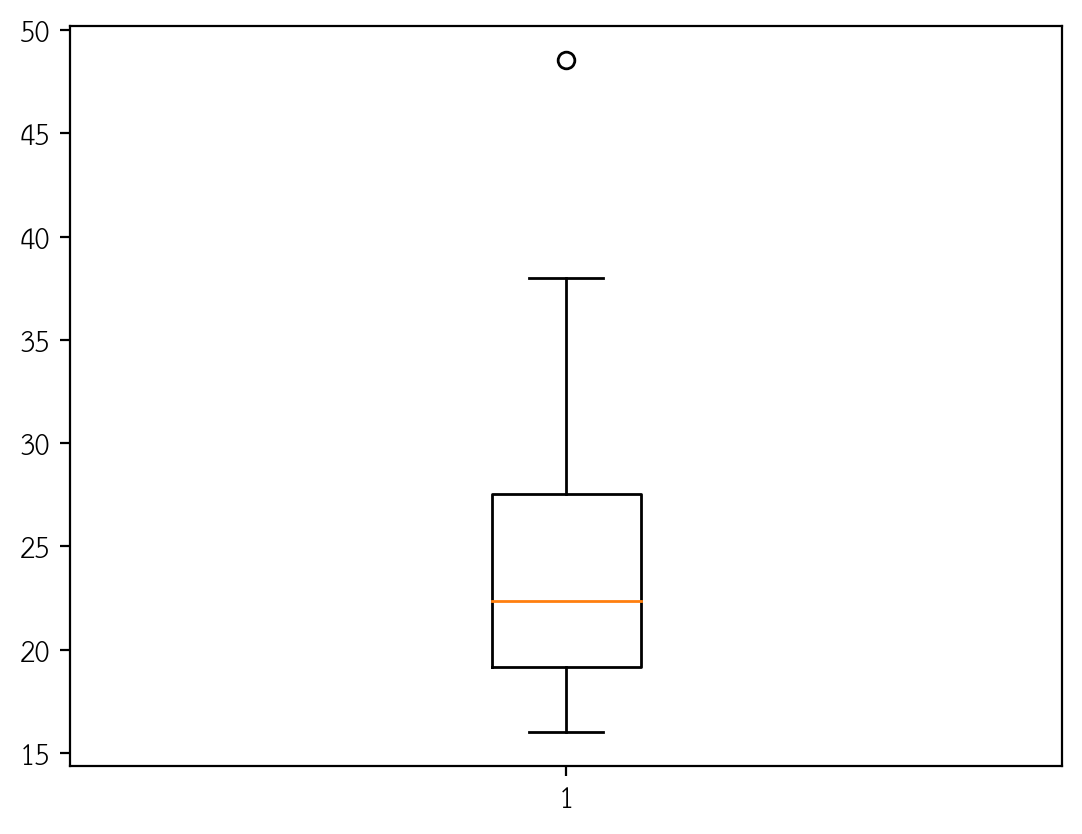

In [ ]:
plt.boxplot(data['BMI'])

#เพิ่มคอลัมน์ค่า TMRT clo และ met ตามลำดับ

In [ ]:
data["TMRT"] = data['ยกกำลัง 1 ส่วน 4/ 0.25'] - data['ลบ 273.15']
data["Clo"] = 0.55
data["Met"] =  1.2
data

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met
0,1,2022-12-28 00:00:00,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,2,0,-1,0,-1,0,30.628551,0.55,1.2
1,2,2022-12-28 00:00:00,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,1,0,0,1,-1,0,30.628551,0.55,1.2
2,3,2022-12-28 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,1,1,0,0,0,0,0,30.628551,0.55,1.2
3,4,2022-12-28 00:00:00,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,4,2,-1,0,0,-1,1,30.628551,0.55,1.2
4,5,2022-12-28 00:00:00,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,0,-1,-1,0,-1,0,30.628551,0.55,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,13/05/2023,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,3,2,-1,1,0,-1,-1,36.559615,0.55,1.2
189,190,13/05/2023,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,3,4,-1,1,1,-1,-1,36.559615,0.55,1.2
190,191,13/05/2023,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,5,3,-1,-1,1,-1,-1,36.559615,0.55,1.2
191,192,13/05/2023,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,0,3,-1,1,1,-1,-1,36.559615,0.55,1.2


In [ ]:
data.describe()

,No,Age,Weight,Height,BMI,Temp,Globe temp,RH,V,วงเล็บ 1,...,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02,1.930000e+02
mean,97.000000,30.720207,68.538860,167.331606,24.364511,30.895337,31.533161,48.780829,0.265311,8.621030e+09,...,2.207254,2.129534,-0.647668,-0.103627,0.637306,-0.419689,-0.450777,31.777293,5.500000e-01,1.200000e+00
std,55.858452,11.950177,22.290455,9.716496,7.089200,2.310264,2.432899,7.491418,0.285395,2.756796e+08,...,2.010014,1.941544,0.510522,0.558679,0.543002,0.554363,0.558002,2.489153,1.113110e-16,2.226221e-16
min,1.000000,20.000000,41.000000,144.000000,16.015625,27.200000,27.600000,38.100000,0.045000,8.181304e+09,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,27.730857,5.500000e-01,1.200000e+00
25%,49.000000,25.000000,49.000000,159.000000,19.146722,29.100000,29.800000,42.500000,0.120000,8.423330e+09,...,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,30.211258,5.500000e-01,1.200000e+00
50%,97.000000,27.000000,63.000000,169.000000,22.343516,30.800000,31.800000,46.600000,0.185000,8.647977e+09,...,2.000000,2.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,31.939186,5.500000e-01,1.200000e+00
75%,145.000000,36.000000,75.000000,173.000000,27.548209,32.700000,33.100000,56.100000,0.330000,8.796388e+09,...,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,33.219269,5.500000e-01,1.200000e+00
max,193.000000,70.000000,147.000000,187.000000,48.553310,35.600000,36.200000,64.200000,1.765000,9.157997e+09,...,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.559615,5.500000e-01,1.200000e+00


##drop คอลัมน์ -3 ถึง 3 และคอลัมน์สูตรในการคำนวณหา TMRT ออก

In [ ]:
data.drop([-3, -2, -1, 0, '+1', '+2', '+3'], axis=1, inplace=True)

In [ ]:

data.drop(['วงเล็บ 1', 'สมการหลัง บวก', 'วงเล็บ 2','ยกกำลัง 1 ส่วน 4/ 0.25', 'ลบ 273.15'  ], axis=1, inplace=True)

In [ ]:
data.shape

(193, 28)

In [ ]:
data.columns

Index(['No', 'Date', 'เพศ', 'Age', 'Weight', 'Height', 'BMI',
       'พื้นที่ทำแบบสอบถาม', 'เวลา', 'Temp', 'Globe temp', 'RH', 'V',
       'Thermal_acceptance', 'Thermal_sensation_Vote', 'อุณหภูมิ', 'ความชื้น',
       'กระแสลม', 'ความแรงของแสงแดด', 'เหงื่อบริเวณผิวหนัง', 'ความร้อน',
       'ความชื้น.1', 'กระแสลม.1', 'แสงแดด', 'เหงื่อบริเวณผิวหนัง.1', 'TMRT',
       'Clo', 'Met'],
      dtype='object')

##แทนค่าลักษณะของคำที่เหมือนกัน

In [ ]:
set(data['พื้นที่ทำแบบสอบถาม'])

{'ภายนอก / ใต้ร่มไม้',
 'ภายนอก กลางแจ้ง',
 'ภายนอก/ กลางแจ้ง',
 'ภายนอก/ มีหลังคาคลุม',
 'ภายใต้ร่มไม้',
 'ภายใต้อาคาร'}

In [ ]:
data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายใต้ร่มไม้'] = 'ภายนอก / ใต้ร่มไม้'
data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายนอก กลางแจ้ง'] = 'ภายนอก/ กลางแจ้ง'

<ipython-input-29-daf20139a280>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายใต้ร่มไม้'] = 'ภายนอก / ใต้ร่มไม้'
<ipython-input-29-daf20139a280>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายนอก กลางแจ้ง'] = 'ภายนอก/ กลางแจ้ง'


In [ ]:
set(data['พื้นที่ทำแบบสอบถาม'])

{'ภายนอก / ใต้ร่มไม้',
 'ภายนอก/ กลางแจ้ง',
 'ภายนอก/ มีหลังคาคลุม',
 'ภายใต้อาคาร'}

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No                      193 non-null    int64  
 1   Date                    193 non-null    object 
 2   เพศ                     193 non-null    object 
 3   Age                     193 non-null    int64  
 4   Weight                  193 non-null    float64
 5   Height                  193 non-null    float64
 6   BMI                     193 non-null    float64
 7   พื้นที่ทำแบบสอบถาม      193 non-null    object 
 8   เวลา                    193 non-null    object 
 9   Temp                    193 non-null    float64
 10  Globe temp              193 non-null    float64
 11  RH                      193 non-null    float64
 12  V                       193 non-null    float64
 13  Thermal_acceptance      193 non-null    object 
 14  Thermal_sensation_Vote  193 non-null    in

##เปลี่ยนวันที่เป็น datetime

In [ ]:
set(data['Date'])

{'13/05/2023',
 datetime.datetime(2022, 12, 28, 0, 0),
 datetime.datetime(2023, 1, 6, 0, 0),
 datetime.datetime(2023, 1, 8, 0, 0)}

In [ ]:
data['Date'] = pd.to_datetime(data.Date)

<ipython-input-33-2e81f6b9fef3>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data.Date)


In [ ]:
set(data['Date'])

{Timestamp('2022-12-28 00:00:00'),
 Timestamp('2023-01-06 00:00:00'),
 Timestamp('2023-01-08 00:00:00'),
 Timestamp('2023-05-13 00:00:00')}

In [ ]:
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
conditions = [
    data.Date.dt.month.isin(np.arange(5,10)),
    (data.Date.dt.month.isin(np.arange(1,5))) | (data.Date.dt.month.isin(np.arange(10,13))),
]
choices = ['summer','winter']
data['seasons'] = np.select(conditions, choices)
data

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met,seasons
0,1,2022-12-28,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,0,-1,0,-1,0,30.628551,0.55,1.2,winter
1,2,2022-12-28,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,1,0,0,1,-1,0,30.628551,0.55,1.2,winter
2,3,2022-12-28,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,1,0,0,0,0,0,30.628551,0.55,1.2,winter
3,4,2022-12-28,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,-1,0,0,-1,1,30.628551,0.55,1.2,winter
4,5,2022-12-28,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,0,-1,-1,0,-1,0,30.628551,0.55,1.2,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,2023-05-13,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,2,-1,1,0,-1,-1,36.559615,0.55,1.2,summer
189,190,2023-05-13,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,4,-1,1,1,-1,-1,36.559615,0.55,1.2,summer
190,191,2023-05-13,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,3,-1,-1,1,-1,-1,36.559615,0.55,1.2,summer
191,192,2023-05-13,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,3,-1,1,1,-1,-1,36.559615,0.55,1.2,summer


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   No                      193 non-null    int64         
 1   Date                    193 non-null    datetime64[ns]
 2   เพศ                     193 non-null    object        
 3   Age                     193 non-null    int64         
 4   Weight                  193 non-null    float64       
 5   Height                  193 non-null    float64       
 6   BMI                     193 non-null    float64       
 7   พื้นที่ทำแบบสอบถาม      193 non-null    object        
 8   เวลา                    193 non-null    object        
 9   Temp                    193 non-null    float64       
 10  Globe temp              193 non-null    float64       
 11  RH                      193 non-null    float64       
 12  V                       193 non-null    float64   



#histogram
##ของตัวแปร อายุ น้ำหนัก ส่วนสูง ค่า bmi อุณหภูมิ ความชื้นสัมพัทธ์ ความเร็วลม และTMRT

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

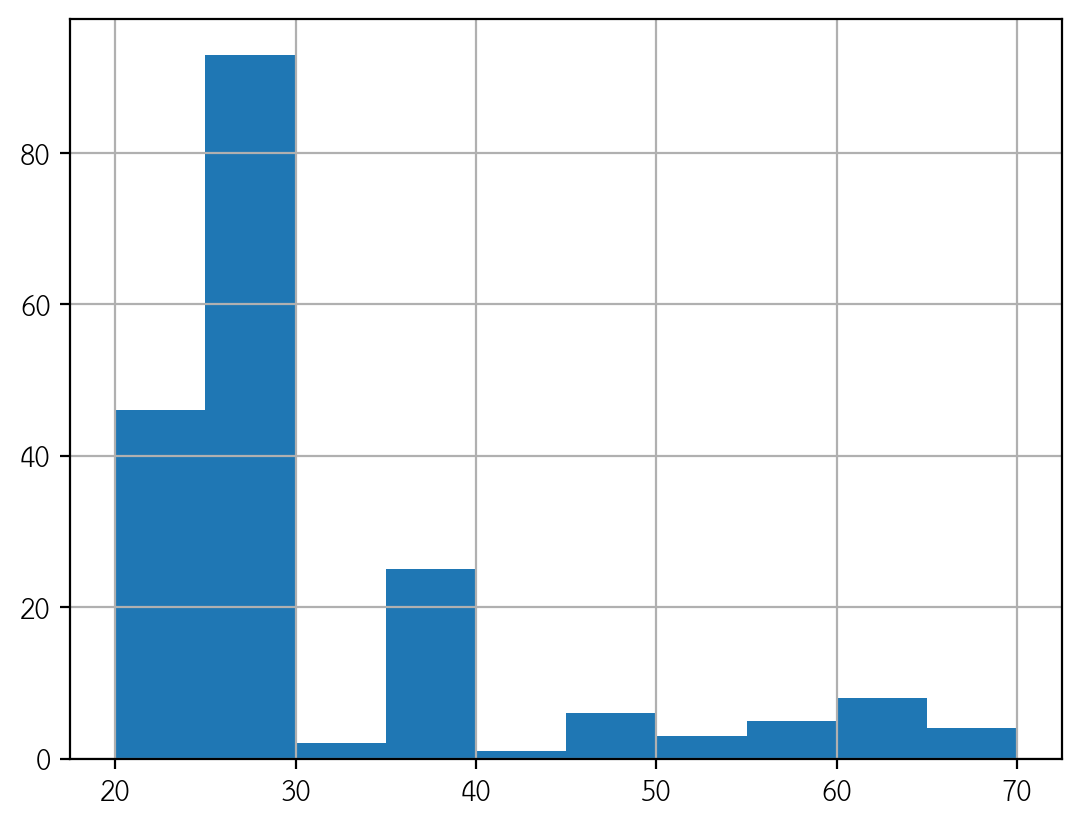

In [74]:
data.Age.hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

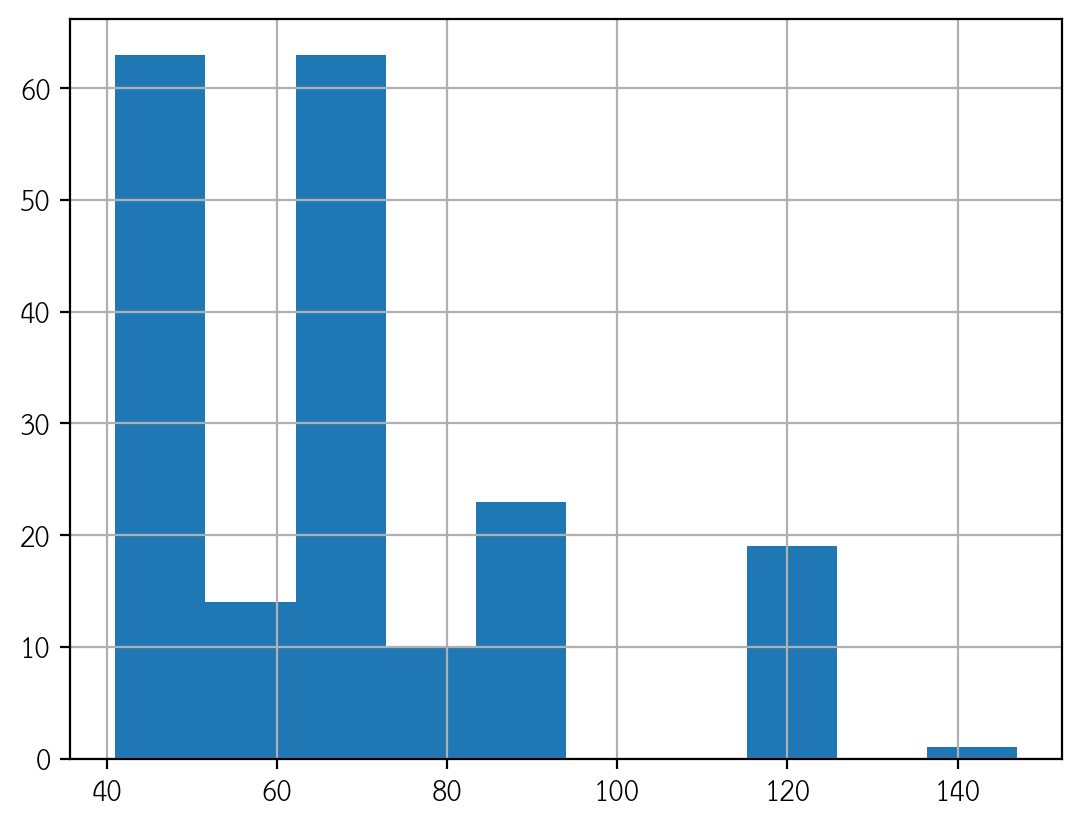

In [71]:
data.Weight.hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

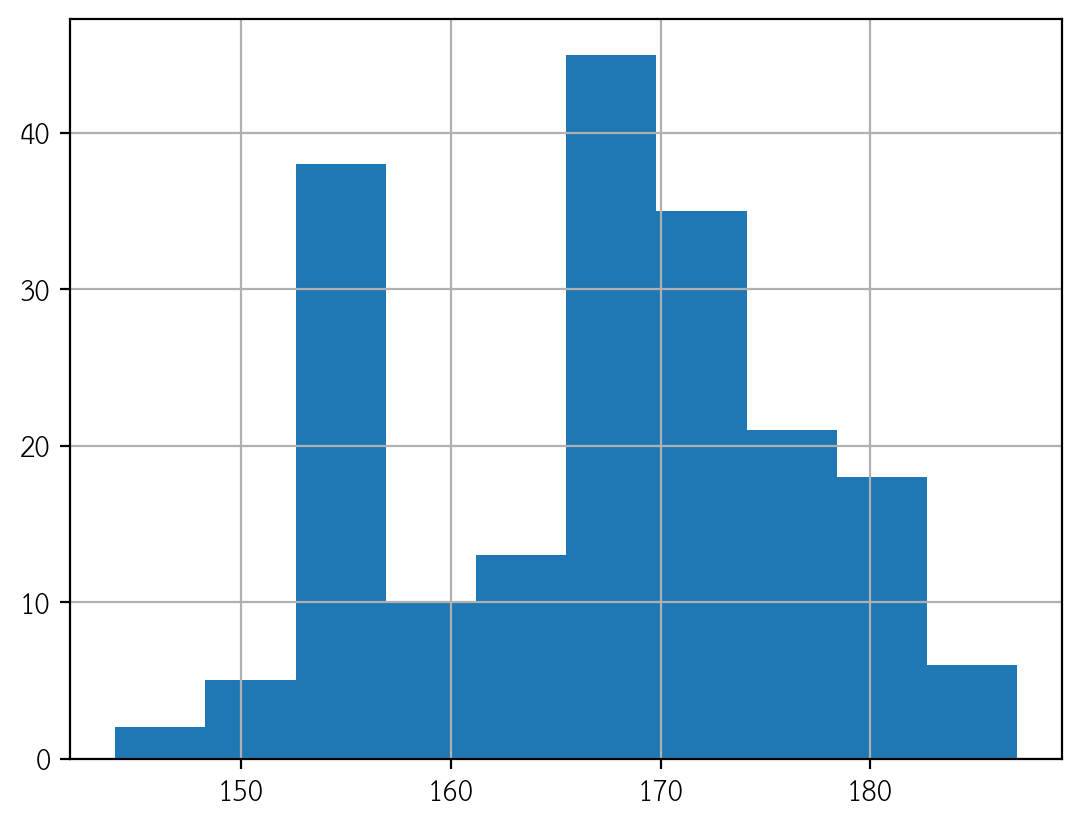

In [72]:
data.Height.hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

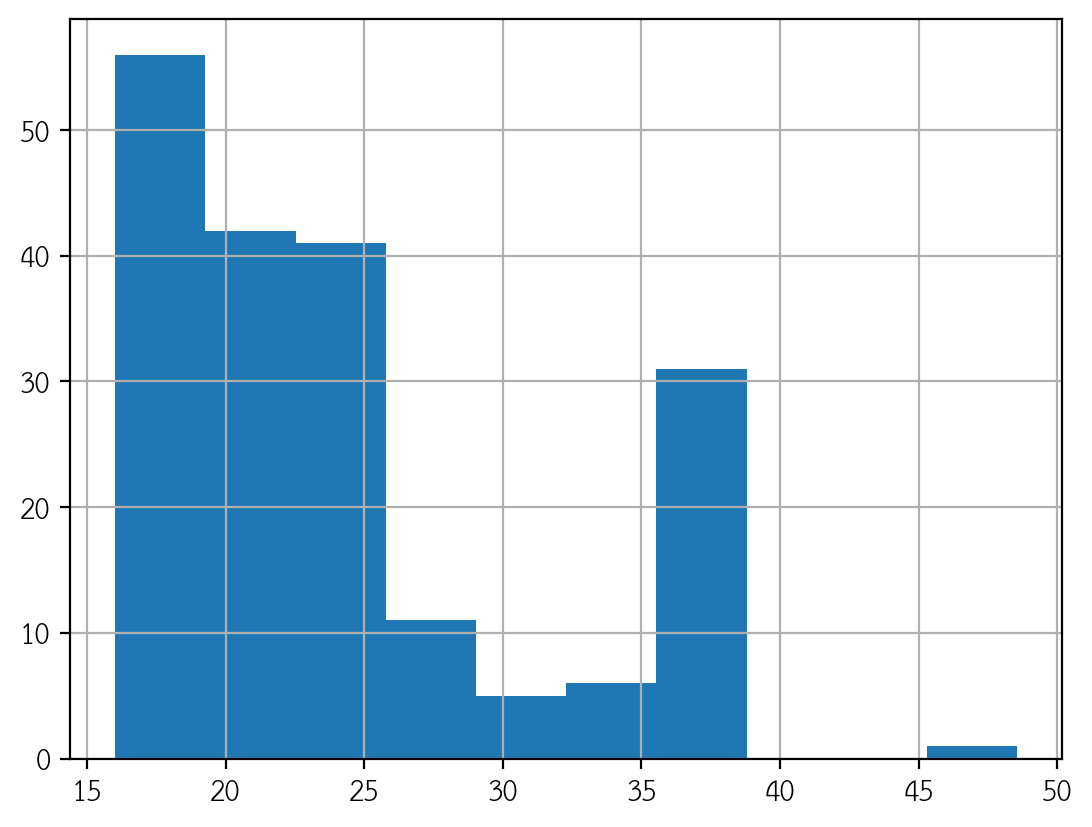

In [73]:
data.BMI.hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

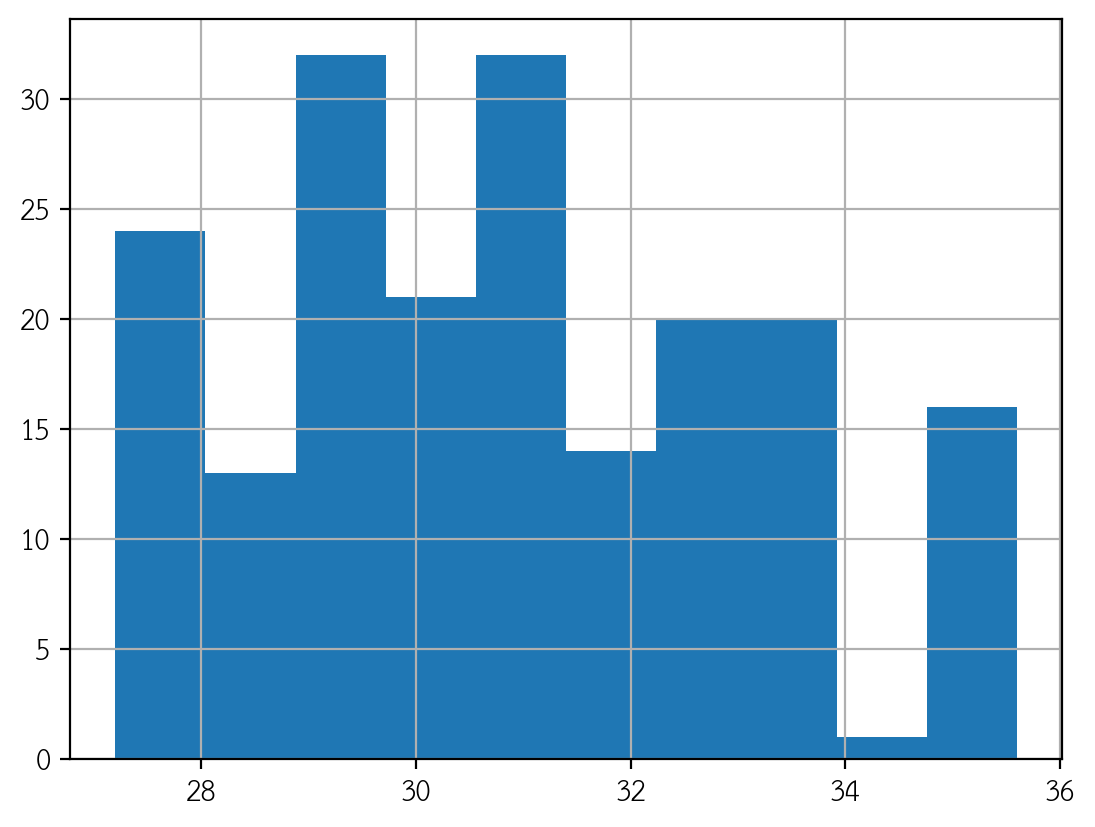

In [75]:
data.Temp.hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

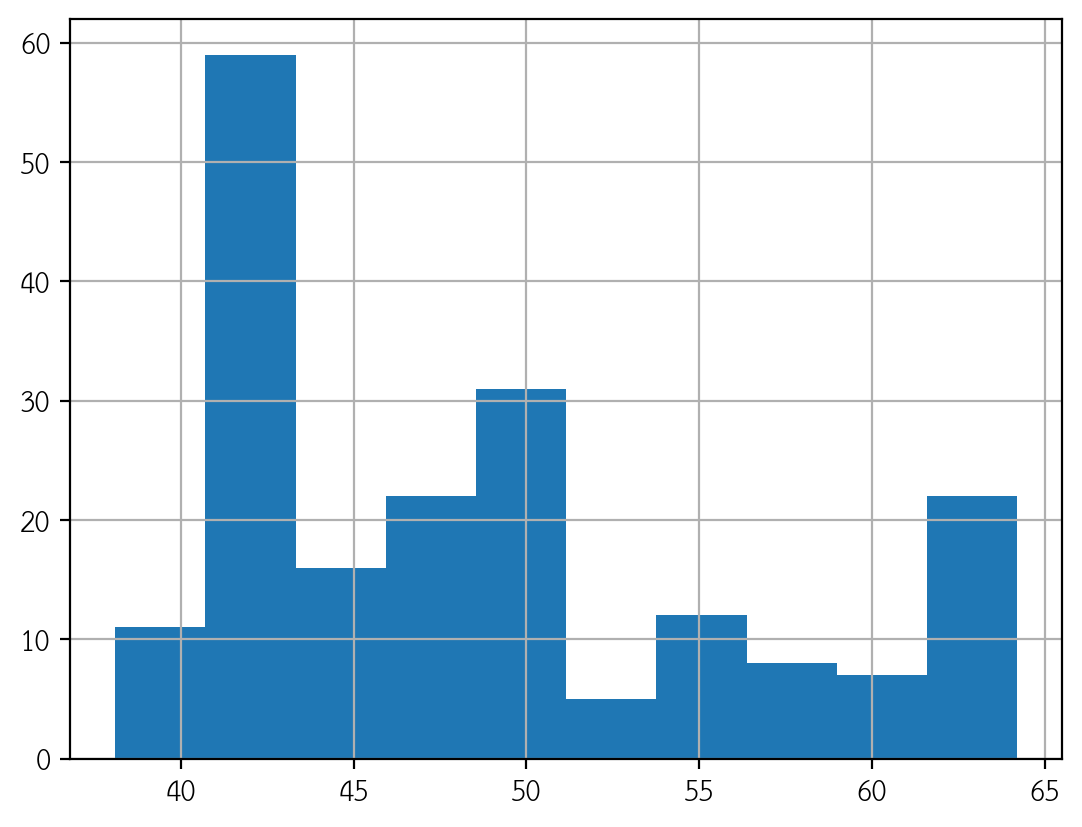

In [76]:
data.RH.hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

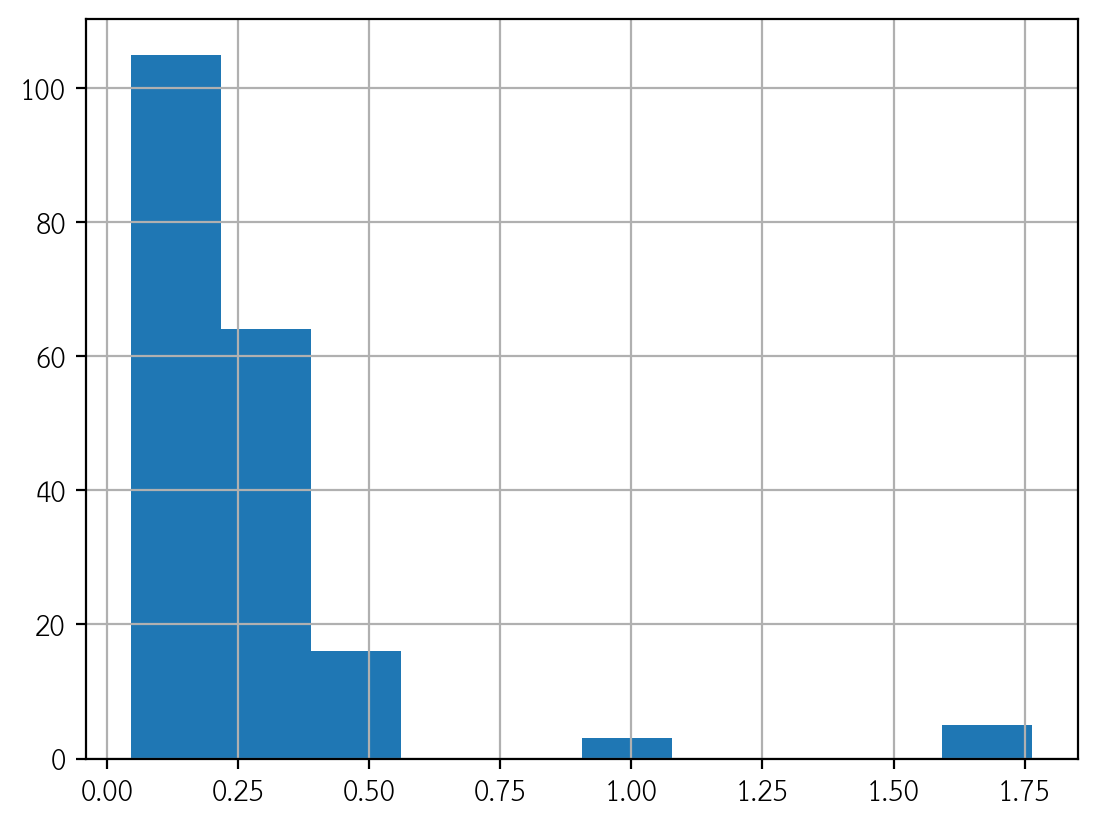

In [77]:
data.V.hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

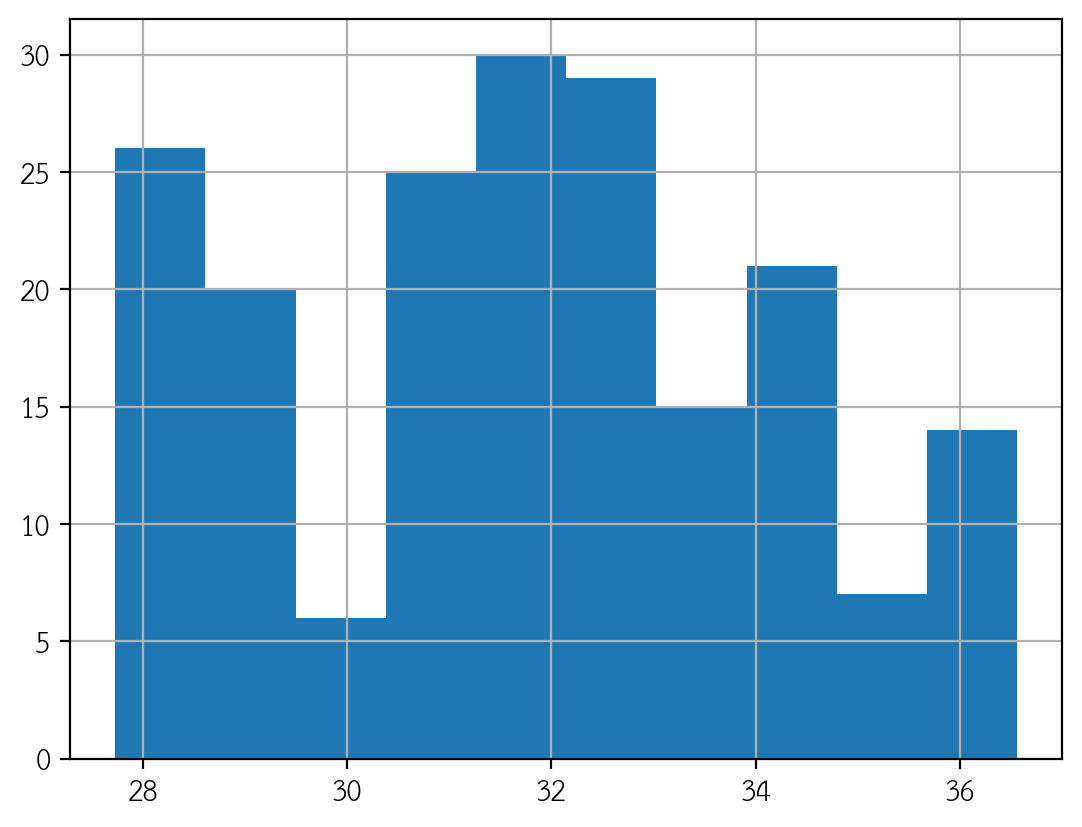

In [78]:
data.TMRT.hist()

#แบ่งกลุ่มข้อมูล

In [135]:
def convert_to_buckets(Age):
    if Age < 25:
          return 'วัยรุ่น'
    elif Age < 45:
          return 'วัยทำงาน'
    else:
        return 'คนแก่'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [136]:
data['age_cat']=data['Age'].map(convert_to_buckets)
data['age_cat'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


วัยทำงาน    121
วัยรุ่น      46
คนแก่        26
Name: age_cat, dtype: int64

In [137]:
def convert_to_buckets(Weight):
    if Weight < 70:
          return 'น้ำหนักปานกลาง'
    elif Weight < 100:
          return 'น้ำหนักเยอะ'
    elif Weight < 130:
          return 'น้ำหนักเยอะมาก'
    else:
        return 'น้ำหนักเยอะที่สุด'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [138]:
data['weight_cat']=data['Weight'].map(convert_to_buckets)
data['weight_cat'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


น้ำหนักปานกลาง       119
น้ำหนักเยอะ           54
น้ำหนักเยอะมาก        19
น้ำหนักเยอะที่สุด      1
Name: weight_cat, dtype: int64

In [139]:
def convert_to_buckets(V):
    if V < 0.60:
          return 'ลมน้อย'
    elif V< 1.10:
          return 'ลมปานกลาง'
    else:
        return 'ลมแรง'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
data['v_cat']=data['V'].map(convert_to_buckets)
data['v_cat'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ลมน้อย       185
ลมแรง          5
ลมปานกลาง      3
Name: v_cat, dtype: int64

In [141]:
def convert_to_buckets(Height):
    if Height < 130:
          return 'เตี้ย'
    elif Height < 160:
          return 'สูงปานกลาง'
    else:
        return 'สูง'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [142]:
data['height_cat']=data['Height'].map(convert_to_buckets)
data['height_cat'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


สูง           144
สูงปานกลาง     49
Name: height_cat, dtype: int64

In [143]:
def convert_to_buckets(RH):
    if RH < 45:
          return 'ความชื้นน้อย'
    elif RH < 55:
          return 'ความชื้นปานกลาง'
    else:
        return 'ความชื้นมาก'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [144]:
data['rh_cat']=data['RH'].map(convert_to_buckets)
data['rh_cat'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ความชื้นน้อย       86
ความชื้นปานกลาง    58
ความชื้นมาก        49
Name: rh_cat, dtype: int64

In [145]:
def convert_to_buckets(TMRT):
    if TMRT < 30:
          return 'TMRTต่ำ'
    else:
        return  'TMRTสูง'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [146]:
data['tmrt_cat']=data['TMRT'].map(convert_to_buckets)
data['tmrt_cat'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TMRTสูง    147
TMRTต่ำ     46
Name: tmrt_cat, dtype: int64

In [147]:
def convert_to_buckets(BMI):
    if BMI < 30:
          return 'สมส่วน'
    elif BMI < 45:
          return 'อ้วน'
    else:
        return 'อ้วนมาก'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [148]:
data['bmi_cat']= data['BMI'].map(convert_to_buckets)
data['bmi_cat'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


สมส่วน     153
อ้วน        39
อ้วนมาก      1
Name: bmi_cat, dtype: int64

In [149]:
def convert_to_buckets(Temp):
    if Temp < 30:
          return 'อากาศเย็น'
    else:
        return  'อากาศร้อน'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [150]:
data['temp_cat']=data['Temp'].map(convert_to_buckets)
data['temp_cat'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


อากาศร้อน    121
อากาศเย็น     72
Name: temp_cat, dtype: int64

#Association Rules

In [151]:
!pip install apyori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [152]:
!pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [153]:
from mlxtend.frequent_patterns import apriori, association_rules
import apyori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   No                      193 non-null    int64         
 1   Date                    193 non-null    datetime64[ns]
 2   เพศ                     193 non-null    object        
 3   Age                     193 non-null    int64         
 4   Weight                  193 non-null    float64       
 5   Height                  193 non-null    float64       
 6   BMI                     193 non-null    float64       
 7   พื้นที่ทำแบบสอบถาม      193 non-null    object        
 8   เวลา                    193 non-null    object        
 9   Temp                    193 non-null    float64       
 10  Globe temp              193 non-null    float64       
 11  RH                      193 non-null    float64       
 12  V                       193 non-null    float64   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [155]:
cols = ['age_cat','weight_cat','height_cat', 'bmi_cat', 'temp_cat','rh_cat','tmrt_cat','v_cat','Thermal_acceptance']
in_df = data[cols]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [156]:
in_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age_cat,weight_cat,height_cat,bmi_cat,temp_cat,rh_cat,tmrt_cat,v_cat,Thermal_acceptance
0,วัยทำงาน,น้ำหนักปานกลาง,สูง,สมส่วน,อากาศร้อน,ความชื้นน้อย,TMRTสูง,ลมน้อย,Accept
1,วัยทำงาน,น้ำหนักเยอะ,สูง,สมส่วน,อากาศร้อน,ความชื้นน้อย,TMRTสูง,ลมน้อย,Accept
2,วัยทำงาน,น้ำหนักเยอะ,สูงปานกลาง,อ้วน,อากาศร้อน,ความชื้นน้อย,TMRTสูง,ลมน้อย,Accept
3,วัยทำงาน,น้ำหนักเยอะ,สูง,สมส่วน,อากาศร้อน,ความชื้นน้อย,TMRTสูง,ลมน้อย,Accept
4,วัยทำงาน,น้ำหนักเยอะมาก,สูง,อ้วน,อากาศร้อน,ความชื้นน้อย,TMRTสูง,ลมน้อย,Accept


In [157]:
dataset = []
for i in range(0, in_df.shape[0]-1):
    dataset.append([str(in_df.values[i,j]) for j in range(0, in_df.shape[1])])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [158]:
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Accept,TMRTต่ำ,TMRTสูง,Unaccept,คนแก่,ความชื้นน้อย,ความชื้นปานกลาง,ความชื้นมาก,น้ำหนักปานกลาง,น้ำหนักเยอะ,...,ลมแรง,วัยทำงาน,วัยรุ่น,สมส่วน,สูง,สูงปานกลาง,อากาศร้อน,อากาศเย็น,อ้วน,อ้วนมาก
0,True,False,True,False,False,True,False,False,True,False,...,False,True,False,True,True,False,True,False,False,False
1,True,False,True,False,False,True,False,False,False,True,...,False,True,False,True,True,False,True,False,False,False
2,True,False,True,False,False,True,False,False,False,True,...,False,True,False,False,False,True,True,False,True,False
3,True,False,True,False,False,True,False,False,False,True,...,False,True,False,True,True,False,True,False,False,False
4,True,False,True,False,False,True,False,False,False,False,...,False,True,False,False,True,False,True,False,True,False


##mini sup

In [159]:
output = apriori(df, min_support=0.2, use_colnames=oht.columns_)
output.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.239583,(TMRTต่ำ)
2,0.760417,(TMRTสูง)
3,0.447917,(ความชื้นน้อย)
4,0.296875,(ความชื้นปานกลาง)


In [160]:
output = apriori(df, min_support=0.3, use_colnames=True)
output.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.760417,(TMRTสูง)
2,0.447917,(ความชื้นน้อย)
3,0.614583,(น้ำหนักปานกลาง)
4,0.958333,(ลมน้อย)


In [161]:
output = apriori(df, min_support=0.4, use_colnames=True)
output.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.760417,(TMRTสูง)
2,0.447917,(ความชื้นน้อย)
3,0.614583,(น้ำหนักปานกลาง)
4,0.958333,(ลมน้อย)


In [162]:
output = apriori(df, min_support=0.5, use_colnames=True)
output.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.760417,(TMRTสูง)
2,0.614583,(น้ำหนักปานกลาง)
3,0.958333,(ลมน้อย)
4,0.630208,(วัยทำงาน)


In [163]:
output = apriori(df, min_support=0.6, use_colnames=True)
output.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.760417,(TMRTสูง)
2,0.614583,(น้ำหนักปานกลาง)
3,0.958333,(ลมน้อย)
4,0.630208,(วัยทำงาน)


In [164]:
output = apriori(df, min_support=0.7, use_colnames=True)
output.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.760417,(TMRTสูง)
2,0.958333,(ลมน้อย)
3,0.791667,(สมส่วน)
4,0.750000,(สูง)


## mini conf

In [165]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf3 = association_rules(output, metric = "confidence", min_threshold = 0.3)
frequent_conf3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(ลมน้อย),0.890625,0.958333,0.848958,0.953216,0.994661,-0.004557,0.890625,-0.046784
1,(ลมน้อย),(Accept),0.958333,0.890625,0.848958,0.885870,0.994661,-0.004557,0.958333,-0.114130
2,(ลมน้อย),(TMRTสูง),0.958333,0.760417,0.744792,0.777174,1.022037,0.016059,1.075203,0.517483
3,(TMRTสูง),(ลมน้อย),0.760417,0.958333,0.744792,0.979452,1.022037,0.016059,2.027778,0.089997
4,(สมส่วน),(ลมน้อย),0.791667,0.958333,0.760417,0.960526,1.002288,0.001736,1.055556,0.010959
5,(ลมน้อย),(สมส่วน),0.958333,0.791667,0.760417,0.793478,1.002288,0.001736,1.008772,0.054795
6,(ลมน้อย),(สูง),0.958333,0.750000,0.718750,0.750000,1.000000,0.000000,1.000000,0.000000
7,(สูง),(ลมน้อย),0.750000,0.958333,0.718750,0.958333,1.000000,0.000000,1.000000,0.000000


In [166]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf4 = association_rules(output, metric = "confidence", min_threshold = 0.4)
frequent_conf4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(ลมน้อย),0.890625,0.958333,0.848958,0.953216,0.994661,-0.004557,0.890625,-0.046784
1,(ลมน้อย),(Accept),0.958333,0.890625,0.848958,0.885870,0.994661,-0.004557,0.958333,-0.114130
2,(ลมน้อย),(TMRTสูง),0.958333,0.760417,0.744792,0.777174,1.022037,0.016059,1.075203,0.517483
3,(TMRTสูง),(ลมน้อย),0.760417,0.958333,0.744792,0.979452,1.022037,0.016059,2.027778,0.089997
4,(สมส่วน),(ลมน้อย),0.791667,0.958333,0.760417,0.960526,1.002288,0.001736,1.055556,0.010959
5,(ลมน้อย),(สมส่วน),0.958333,0.791667,0.760417,0.793478,1.002288,0.001736,1.008772,0.054795
6,(ลมน้อย),(สูง),0.958333,0.750000,0.718750,0.750000,1.000000,0.000000,1.000000,0.000000
7,(สูง),(ลมน้อย),0.750000,0.958333,0.718750,0.958333,1.000000,0.000000,1.000000,0.000000


In [167]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf5 = association_rules(output, metric = "confidence", min_threshold = 0.5)
frequent_conf5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(ลมน้อย),0.890625,0.958333,0.848958,0.953216,0.994661,-0.004557,0.890625,-0.046784
1,(ลมน้อย),(Accept),0.958333,0.890625,0.848958,0.885870,0.994661,-0.004557,0.958333,-0.114130
2,(ลมน้อย),(TMRTสูง),0.958333,0.760417,0.744792,0.777174,1.022037,0.016059,1.075203,0.517483
3,(TMRTสูง),(ลมน้อย),0.760417,0.958333,0.744792,0.979452,1.022037,0.016059,2.027778,0.089997
4,(สมส่วน),(ลมน้อย),0.791667,0.958333,0.760417,0.960526,1.002288,0.001736,1.055556,0.010959
5,(ลมน้อย),(สมส่วน),0.958333,0.791667,0.760417,0.793478,1.002288,0.001736,1.008772,0.054795
6,(ลมน้อย),(สูง),0.958333,0.750000,0.718750,0.750000,1.000000,0.000000,1.000000,0.000000
7,(สูง),(ลมน้อย),0.750000,0.958333,0.718750,0.958333,1.000000,0.000000,1.000000,0.000000


In [168]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf6 = association_rules(output, metric = "confidence", min_threshold = 0.6)
frequent_conf6

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(ลมน้อย),0.890625,0.958333,0.848958,0.953216,0.994661,-0.004557,0.890625,-0.046784
1,(ลมน้อย),(Accept),0.958333,0.890625,0.848958,0.885870,0.994661,-0.004557,0.958333,-0.114130
2,(ลมน้อย),(TMRTสูง),0.958333,0.760417,0.744792,0.777174,1.022037,0.016059,1.075203,0.517483
3,(TMRTสูง),(ลมน้อย),0.760417,0.958333,0.744792,0.979452,1.022037,0.016059,2.027778,0.089997
4,(สมส่วน),(ลมน้อย),0.791667,0.958333,0.760417,0.960526,1.002288,0.001736,1.055556,0.010959
5,(ลมน้อย),(สมส่วน),0.958333,0.791667,0.760417,0.793478,1.002288,0.001736,1.008772,0.054795
6,(ลมน้อย),(สูง),0.958333,0.750000,0.718750,0.750000,1.000000,0.000000,1.000000,0.000000
7,(สูง),(ลมน้อย),0.750000,0.958333,0.718750,0.958333,1.000000,0.000000,1.000000,0.000000


In [169]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf7 = association_rules(output, metric = "confidence", min_threshold = 0.7)
frequent_conf7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(ลมน้อย),0.890625,0.958333,0.848958,0.953216,0.994661,-0.004557,0.890625,-0.046784
1,(ลมน้อย),(Accept),0.958333,0.890625,0.848958,0.885870,0.994661,-0.004557,0.958333,-0.114130
2,(ลมน้อย),(TMRTสูง),0.958333,0.760417,0.744792,0.777174,1.022037,0.016059,1.075203,0.517483
3,(TMRTสูง),(ลมน้อย),0.760417,0.958333,0.744792,0.979452,1.022037,0.016059,2.027778,0.089997
4,(สมส่วน),(ลมน้อย),0.791667,0.958333,0.760417,0.960526,1.002288,0.001736,1.055556,0.010959
5,(ลมน้อย),(สมส่วน),0.958333,0.791667,0.760417,0.793478,1.002288,0.001736,1.008772,0.054795
6,(ลมน้อย),(สูง),0.958333,0.750000,0.718750,0.750000,1.000000,0.000000,1.000000,0.000000
7,(สูง),(ลมน้อย),0.750000,0.958333,0.718750,0.958333,1.000000,0.000000,1.000000,0.000000


In [170]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf8 = association_rules(output, metric = "confidence", min_threshold = 0.8)
frequent_conf8

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(ลมน้อย),0.890625,0.958333,0.848958,0.953216,0.994661,-0.004557,0.890625,-0.046784
1,(ลมน้อย),(Accept),0.958333,0.890625,0.848958,0.885870,0.994661,-0.004557,0.958333,-0.114130
2,(TMRTสูง),(ลมน้อย),0.760417,0.958333,0.744792,0.979452,1.022037,0.016059,2.027778,0.089997
3,(สมส่วน),(ลมน้อย),0.791667,0.958333,0.760417,0.960526,1.002288,0.001736,1.055556,0.010959
4,(สูง),(ลมน้อย),0.750000,0.958333,0.718750,0.958333,1.000000,0.000000,1.000000,0.000000


#หากบริเวณที่อยู่มีลมน้อยผู้คนยังคงยอมรับสภาพอากาศ